In [ ]:
#pip install numpy pandas matplotlib scikit-learn yfinance --quiet

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (22, 5)
plt.rcParams['figure.dpi'] = 100

In [11]:
PATH = '/Users/dakshbhatnagar/Notebooks/Datasets/Sample - Superstore.csv'

In [12]:
#reading the data using pandas library, changing the encoding helps to read the data
df = pd.read_csv(PATH, encoding='latin1')

In [13]:
#Converting the dataframe to a DB file to write SQL queries later
conn = sqlite3.connect('data.db')
cursor =  conn.cursor()
df.to_sql('superstore', conn, if_exists='replace', index=False)

9994

In [14]:
#Helper function to return a df given a SQL query
def read_sql(query):
    cursor.execute(query)
    results =  cursor.fetchall()
    df =  pd.DataFrame(results, columns = [i[0] for i in cursor.description])
    return df

In [16]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [17]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [8]:
indices = df[df['col'].isnull()][df[df['col'].isnull()]['Another']=='some values'].index.values

In [9]:
df.loc[indices, 'col'] = 'Value to assign'

In [18]:
#Label Encoding
df['Category'].astype('category').cat.codes

0       0
1       0
2       1
3       0
4       1
       ..
9989    0
9990    0
9991    2
9992    1
9993    1
Length: 9994, dtype: int8

In [20]:
#One hot encoding
pd.get_dummies(df['Region'], dtype=int)

,Central,East,South,West
0,0,0,1,0
1,0,0,1,0
2,0,0,0,1
3,0,0,1,0
4,0,0,1,0
...,...,...,...,...
9989,0,0,1,0
9990,0,0,0,1
9991,0,0,0,1
9992,0,0,0,1


In [21]:
df['Sales'] = pd.to_numeric(df['Sales'])

In [22]:
df.dtypes.value_counts()

object     15
int64       3
float64     3
Name: count, dtype: int64

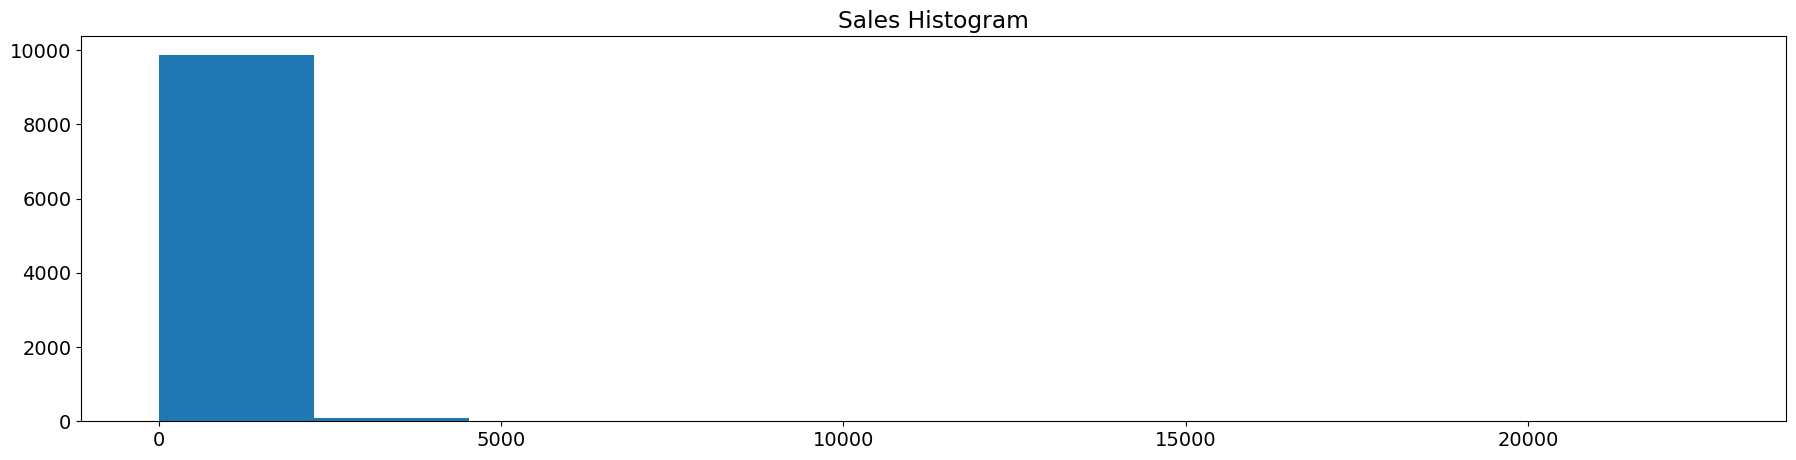

In [23]:
df.select_dtypes(include=['int64', 'float64'])['Sales'].hist()
plt.title('Sales Histogram')
plt.grid(False)
plt.show()

Group data in a DataFrame by one or more columns and calculate aggregate statistics (sum, mean, count, etc.) for each group.

In [24]:
df.groupby(['Category', 'Region'])['Sales'].agg(['count', 'sum', 'mean']).reset_index()

,Category,Region,count,sum,mean
0,Furniture,Central,481,163797.1638,340.534644
1,Furniture,East,601,208291.2040,346.574383
2,Furniture,South,332,117298.6840,353.309289
3,Furniture,West,707,252612.7435,357.302325
4,Office Supplies,Central,1422,167026.4150,117.458801
5,Office Supplies,East,1712,205516.0550,120.044425
6,Office Supplies,South,995,125651.3130,126.282727
7,Office Supplies,West,1897,220853.2490,116.422377
8,Technology,Central,420,170416.3120,405.753124
9,Technology,East,535,264973.9810,495.278469


Long Form to wide form data

In [25]:
pivot = df.pivot_table(values='Sales',
    index='Segment',
    columns='Region',
    aggfunc = 'sum',
    fill_value=0)

In [26]:
pivot

Region,Central,East,South,West
Segment,,,,
Consumer,252031.4340,350908.167,195580.9710,362880.7730
Corporate,157995.8128,200409.347,121885.9325,225855.2745
Home Office,91212.6440,127463.726,74255.0015,136721.7770


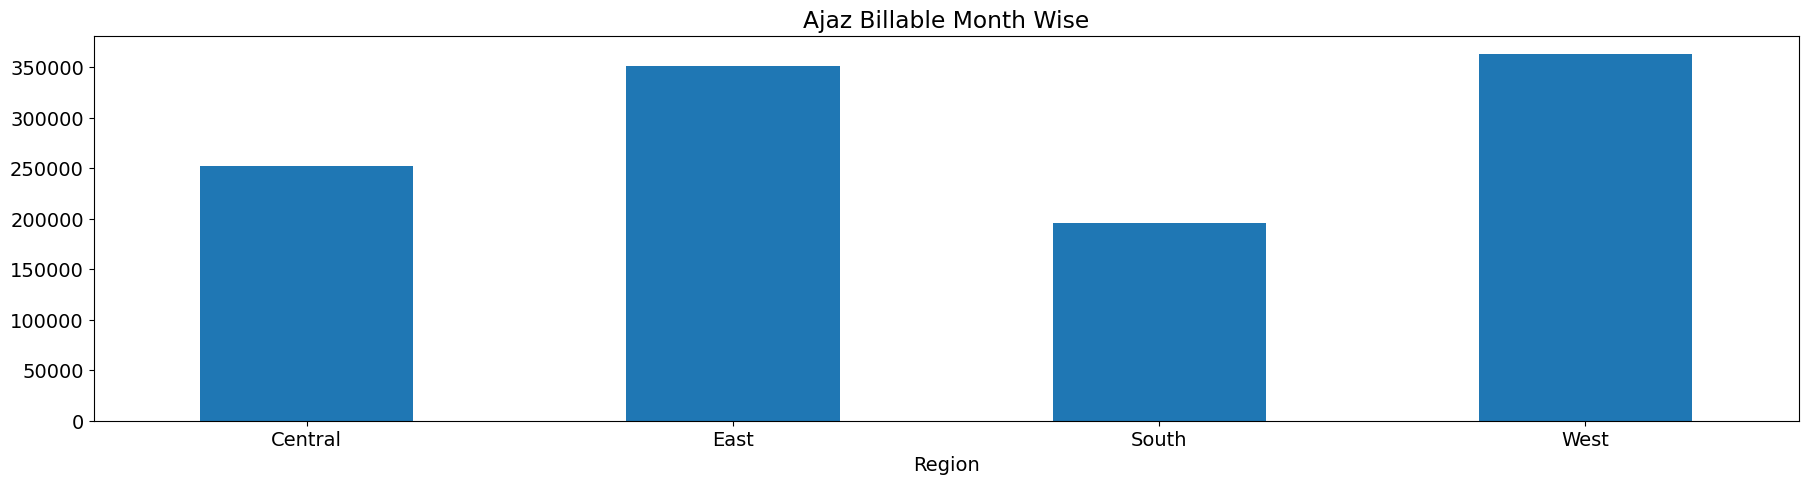

In [27]:
pivot.loc['Consumer'].plot(kind='bar')
plt.title('Ajaz Billable Month Wise')
plt.xticks(rotation=0)
plt.show()

Removing outliers in a numerical data

In [24]:
import yfinance as yf

In [54]:
data = yf.Ticker('AAPL').history(period='max')

In [55]:
data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.099058,0.099488,0.099058,0.099058,469033600,0.0,0.0
1980-12-15 00:00:00-05:00,0.094321,0.094321,0.093890,0.093890,175884800,0.0,0.0
1980-12-16 00:00:00-05:00,0.087429,0.087429,0.086998,0.086998,105728000,0.0,0.0
1980-12-17 00:00:00-05:00,0.089152,0.089582,0.089152,0.089152,86441600,0.0,0.0
1980-12-18 00:00:00-05:00,0.091737,0.092167,0.091737,0.091737,73449600,0.0,0.0


<function matplotlib.pyplot.show(close=None, block=None)>

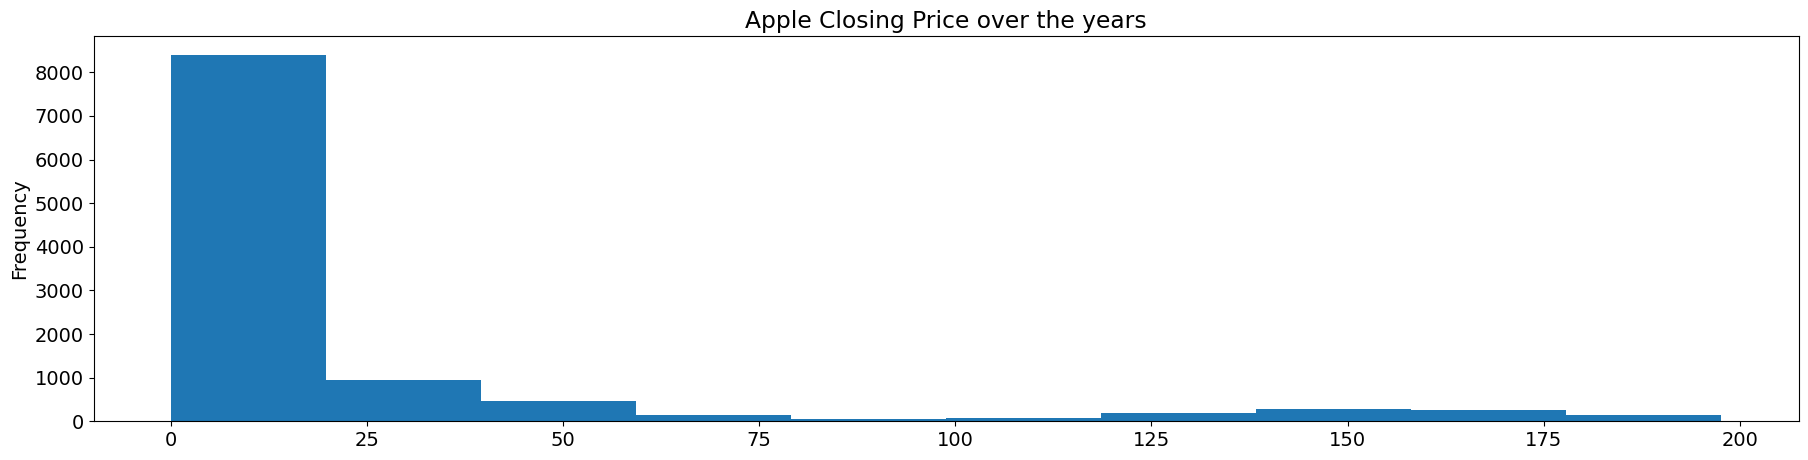

In [56]:
data['Close'].plot(kind='hist')
plt.title('Apple Closing Price over the years')
plt.show()

In [57]:
q1 , q3 = np.quantile(data['Close'], 0.25), np.quantile(data['Close'], 0.75)

In [58]:
q1, median, q3 = list(data['Close'].quantile([0.25, 0.5, 0.75]).values)

In [59]:
iqr = q3 -  q1

In [60]:
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

In [61]:
data.shape

(10945, 7)

In [63]:
data = data[(data['Close'] >= lower_bound) & (data['Close'] <= upper_bound)]
data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.099058,0.099488,0.099058,0.099058,469033600,0.0,0.0
1980-12-15 00:00:00-05:00,0.094321,0.094321,0.093890,0.093890,175884800,0.0,0.0
1980-12-16 00:00:00-05:00,0.087429,0.087429,0.086998,0.086998,105728000,0.0,0.0
1980-12-17 00:00:00-05:00,0.089152,0.089582,0.089152,0.089152,86441600,0.0,0.0
1980-12-18 00:00:00-05:00,0.091737,0.092167,0.091737,0.091737,73449600,0.0,0.0


In [64]:
data.shape

(9481, 7)

In [66]:
print(f"{10945 -  data.shape[0]} rows have been dropped after the outlier removal")

1464 rows have been dropped after the outlier removal


Merging two dataframe based on 1 column. Here we are using index as a common column for the merge.

In [67]:
google_data = yf.Ticker('GOOGL').history(period='max')

In [70]:
google_data.shape

(4968, 7)

In [71]:
data.shape

(9481, 7)

In [72]:
merged_data = google_data.merge(data, left_index = True, right_index = True, how='inner')
merged_data.shape

(3503, 14)

If there were a common column which was not a index then we would merge the dataframes like this.

```python

merged_data = google_data.merge(data, left_on = 'col1', right_on='col1', how='inner')
merged_data.head()
```

How to get the rolling average or rolling sum

In [75]:
data['Close'].ewm(30).agg(['sum', 'mean'])

,sum,mean
Date,,
1980-12-12 00:00:00-05:00,0.099058,0.099058
1980-12-15 00:00:00-05:00,0.189752,0.096431
1980-12-16 00:00:00-05:00,0.270630,0.093183
1980-12-17 00:00:00-05:00,0.351051,0.092125
1980-12-18 00:00:00-05:00,0.431464,0.092042
...,...,...
2019-03-01 00:00:00-05:00,1233.051947,39.775869
2019-03-06 00:00:00-05:00,1235.221741,39.845863
2019-03-07 00:00:00-05:00,1236.836038,39.897937


How to get the seasonality and trend of the data

<Axes: xlabel='Date'>

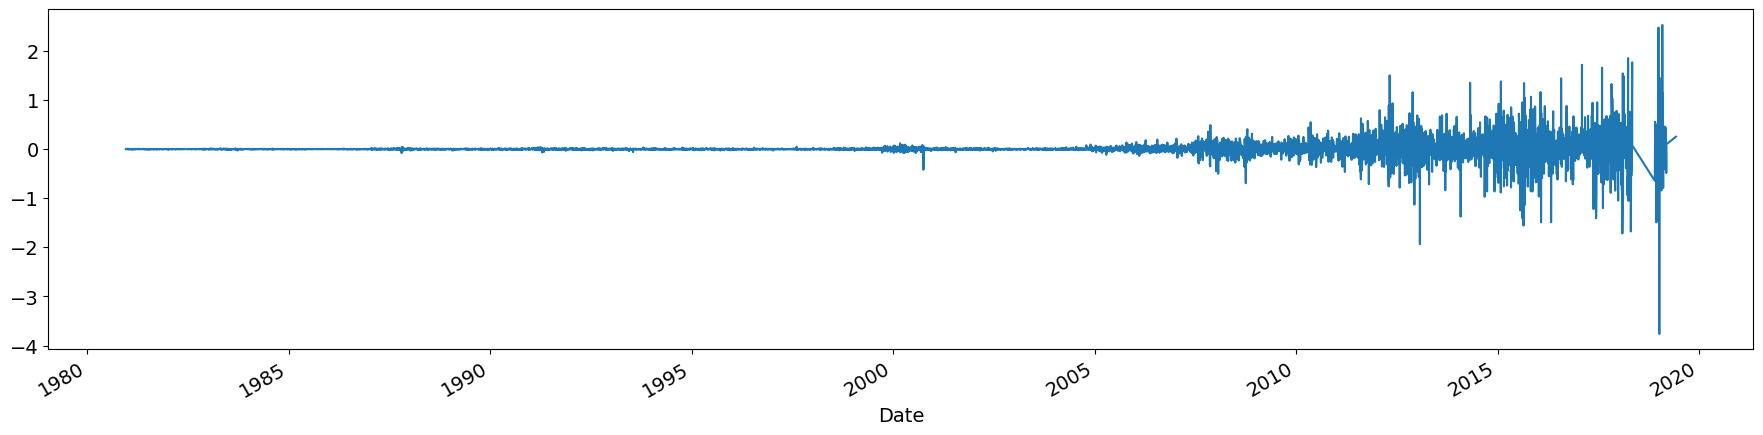

In [77]:
data['Close'].diff().plot()

Plot a line chart

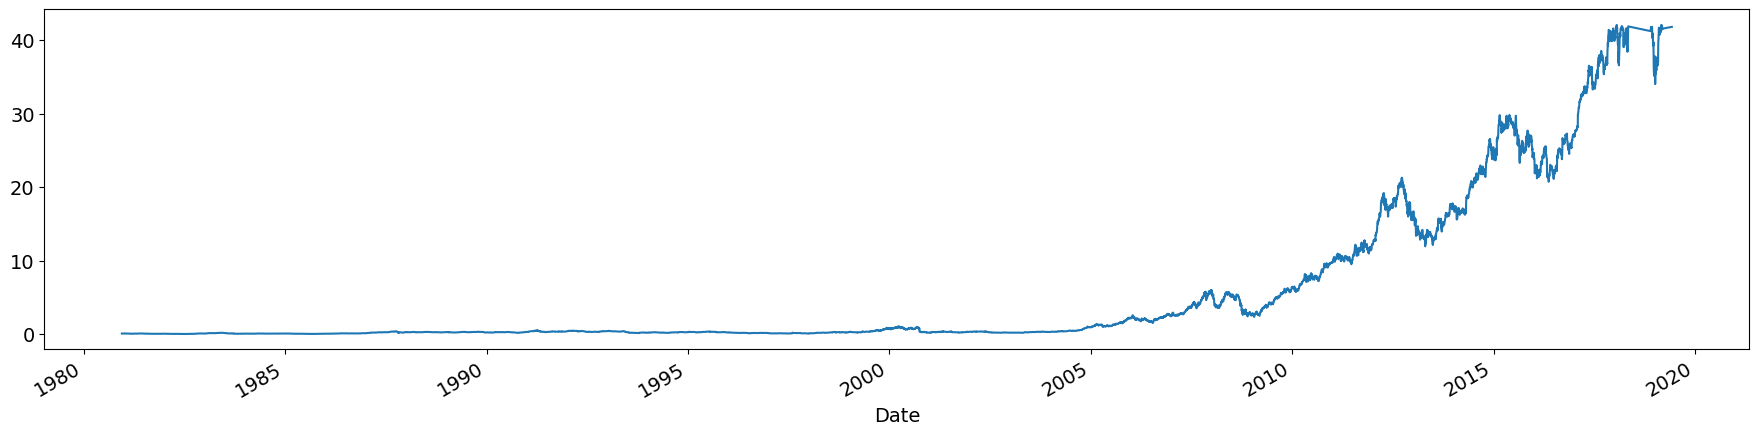

In [78]:
data['Close'].plot()
plt.show()

Change the aesthetics of the line chart

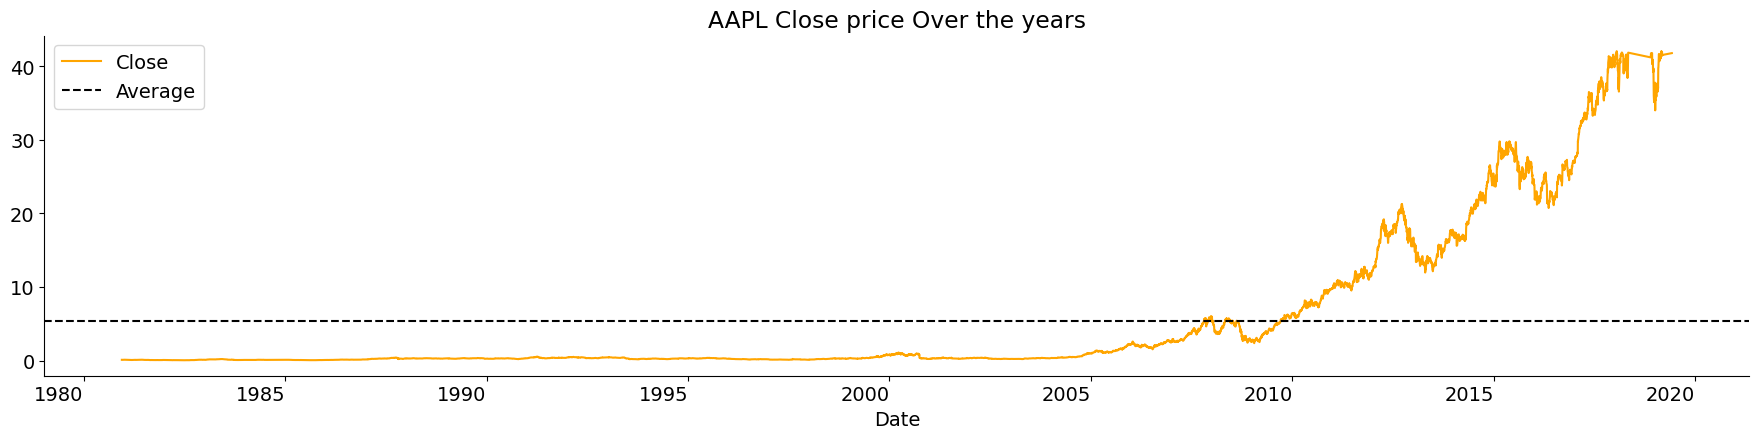

In [83]:
data['Close'].plot(color='orange')
plt.title('AAPL Close price Over the years')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.axhline(data['Close'].mean(), linestyle='dashed', color='black', label='Average')
plt.legend()
plt.xticks(rotation=0)
plt.show()

Train a simple Linear Regression Model

In [86]:
from sklearn.model_selection import train_test_split

In [91]:
df = data[['Open', 'High', 'Low', 'Close']].reset_index()
predictors = list(df.columns[1:-1])

In [96]:
y = df['Close']
X = df[predictors]

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [114]:
from sklearn.linear_model import LinearRegression

In [115]:
model =  LinearRegression()

In [116]:
model.fit(X_train, y_train)

LinearRegression()

Evaluate the performance of a trained model using metrics like accuracy, precision, recall, or mean squared error.

In [117]:
preds = model.predict(X_train)

In [118]:
from sklearn.metrics import r2_score

In [119]:
score = r2_score(y_train, preds)
print(f"The Adjusted R2 Score on the training set is {round(score,6)}.")

The Adjusted R2 Score on the training set is 0.999962.


In [123]:
test_preds =  model.predict(X_test)
test_score =  r2_score(y_test, test_preds)
print(f"The Adjusted R2 Score on the test set is {round(test_score, 6)}.")

The Adjusted R2 Score on the test set is 0.999958.


In [125]:
import sqlite3

In [130]:
conn = sqlite3.connect('finance.db')
cursor = conn.cursor()
def read_sql(query):
    cursor.execute(query)
    results =  cursor.fetchall()
    df =  pd.DataFrame(results, columns=  [i[0] for i in cursor.description])
    return df

df.to_sql('apple', conn, if_exists='replace', index=False)

9481

Write SQL queries to retrieve data from a relational database based on specified criteria (e.g., filtering, sorting, joining tables).

In [132]:
query = '''
select * from apple where Close > (select avg(Close) from apple)
'''
read_sql(query)

,Date,Open,High,Low,Close
0,2007-10-23 00:00:00-04:00,5.693521,5.694728,5.518391,5.621053
1,2007-10-24 00:00:00-04:00,5.610484,5.652756,5.412105,5.614107
2,2007-10-25 00:00:00-04:00,5.582103,5.613204,5.485178,5.518996
3,2007-10-26 00:00:00-04:00,5.594782,5.597197,5.522013,5.576967
4,2007-10-29 00:00:00-04:00,5.599613,5.634035,5.576967,5.588743
...,...,...,...,...,...
2297,2019-03-01 00:00:00-05:00,41.887969,42.097071,41.553884,42.053810
2298,2019-03-06 00:00:00-05:00,41.981714,42.178802,41.806261,41.945663
2299,2019-03-07 00:00:00-05:00,41.789436,41.926436,41.344793,41.460159
2300,2019-03-08 00:00:00-05:00,40.936198,41.597157,40.739110,41.558701


Joining two tables

In [140]:
query = '''
with cte as (select Date, Close from apple where Open > (select avg(Close) from apple) order by Open desc),

cte2 as (select Date, Close from apple where Close < (select avg(Close) from apple) order by Open desc)

select t1.Date, t2.Close from cte t1 join cte2 t2 on t1.Date = t2.Date
'''
read_sql(query)

,Date,Close
0,2007-11-08 00:00:00-05:00,5.298271
1,2008-01-08 00:00:00-05:00,5.170849
2,2008-01-15 00:00:00-05:00,5.104120
3,2008-05-22 00:00:00-04:00,5.345978
4,2008-06-12 00:00:00-04:00,5.231541
5,2008-06-20 00:00:00-04:00,5.292231
6,2008-07-09 00:00:00-04:00,5.261434
7,2008-07-14 00:00:00-04:00,5.250263
8,2008-08-15 00:00:00-04:00,5.306425


Making a calculated column using SQL

In [143]:
query = '''
select Date, Close, sum(Close) over(order by Date asc) as running_sum from apple
'''
read_sql(query)

,Date,Close,running_sum
0,1980-12-12 00:00:00-05:00,0.099058,0.099058
1,1980-12-15 00:00:00-05:00,0.093890,0.192948
2,1980-12-16 00:00:00-05:00,0.086998,0.279946
3,1980-12-17 00:00:00-05:00,0.089152,0.369098
4,1980-12-18 00:00:00-05:00,0.091737,0.460834
...,...,...,...
9476,2019-03-01 00:00:00-05:00,42.053810,50612.030626
9477,2019-03-06 00:00:00-05:00,41.945663,50653.976290
9478,2019-03-07 00:00:00-05:00,41.460159,50695.436449
9479,2019-03-08 00:00:00-05:00,41.558701,50736.995150


Grouping the data by Year (using SQL) and plotting the results

In [169]:
years = list(df['Date'].dt.year.unique())
ticks = np.arange(len(years))

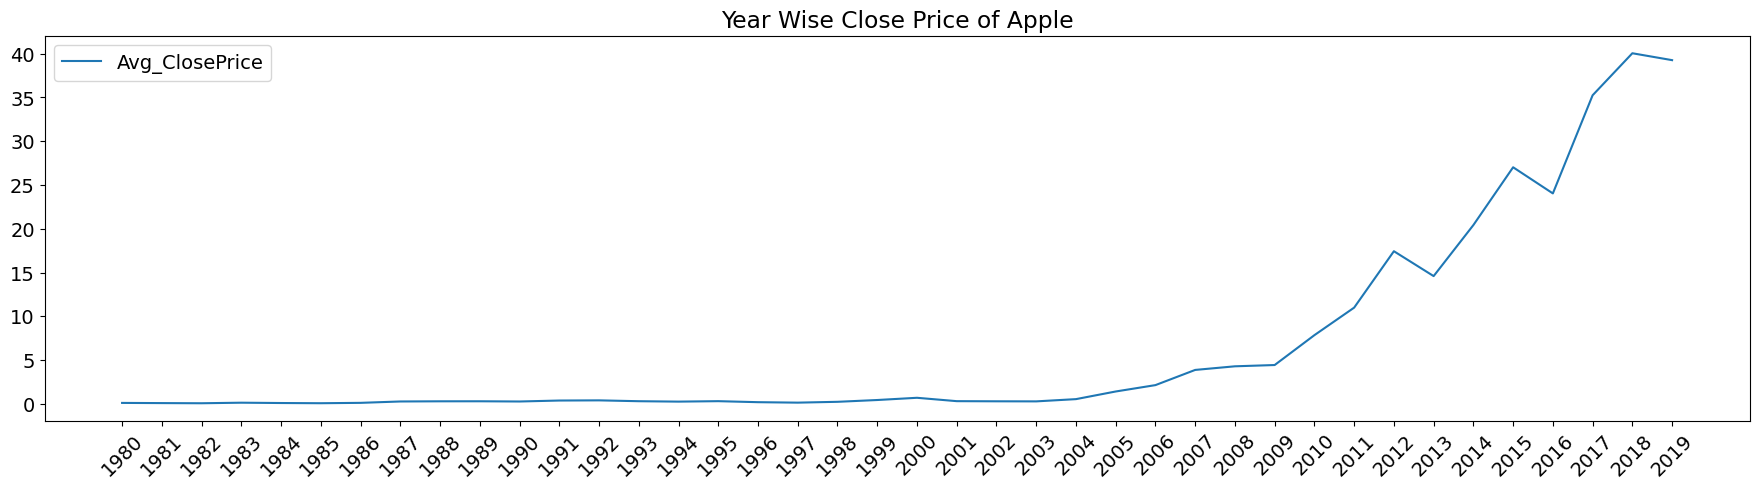

In [171]:
query = '''
select strftime("%Y", Date) as Month, avg(Close) as Avg_ClosePrice from apple group by strftime("%Y", Date)
'''
read_sql(query).plot()
plt.title('Year Wise Close Price of Apple')
plt.xticks(ticks, years, rotation=45)
plt.show()